# -Circuito RC

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

## Simulação do circuito Passa-Baixa com 200 experimentos, de 10Hz a 2000Hz

Tratando os dados para plotar os graficos.

In [6]:
f = open("PassaAlta.txt")
texto = f.readlines()

In [7]:
for i in range(0,len(texto)):
    texto[i] = texto[i].replace("\t", ";")
    texto[i] = texto[i].replace(",", ";")

In [8]:
f = open("PassaAlta.txt", 'w')
f.writelines(texto)
f.close()

In [9]:
df = pd.read_csv("PassaAlta.txt", sep = ";")

In [10]:
df

,Freq,Real,Imaginaria
0,10.0,0.000021,0.004555
1,20.0,0.000083,0.009110
2,30.0,0.000187,0.013663
3,40.0,0.000332,0.018215
4,50.0,0.000519,0.022765
...,...,...,...
995,9960.0,0.953672,0.210195
996,9970.0,0.953760,0.210003
997,9980.0,0.953849,0.209812
998,9990.0,0.953937,0.209622


Preparando o módulo

In [11]:
df["Modulo"] = np.sqrt((df["Real"]**2+df["Imaginaria"]**2))

Preparando o ganho 

In [12]:
df["Ganho"] = 20*np.log10(df["Modulo"])

Preparando a fase

In [13]:
df["Fase"] = np.arctan2(df["Imaginaria"],df["Real"])

In [14]:
df["Fase"] = (180/np.pi)*df["Fase"]

Parte real e imaginaria não são mais necessárias.

In [15]:
df = df.drop(["Real", "Imaginaria"], axis = 1)

In [16]:
df

,Freq,Modulo,Ganho,Fase
0,10.0,0.004555,-46.829733,89.739002
1,20.0,0.009110,-40.809403,89.478014
2,30.0,0.013665,-37.288028,89.217049
3,40.0,0.018218,-34.789884,88.956116
4,50.0,0.022771,-32.852495,88.695226
...,...,...,...,...
995,9960.0,0.976561,-0.206010,12.429587
996,9970.0,0.976607,-0.205607,12.417507
997,9980.0,0.976652,-0.205204,12.405450
998,9990.0,0.976697,-0.204803,12.393416


In [86]:
f_c = float(df[abs(df["Ganho"]+3) < 0.01]["Freq"])
Gain_cut = float(df[abs(df["Ganho"]+3) < 0.01] ["Ganho"])
df[abs(df["Ganho"]+3) < 0.01]
Gain_cut

-3.0009045839720505

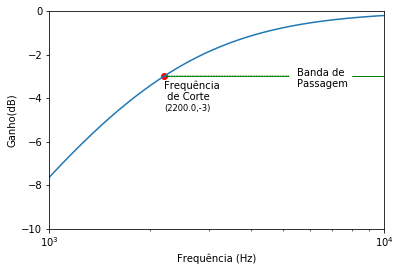

In [125]:
graphGain(df["Freq"], df["Ganho"], f_c, -3) 

### 3) Grapher Gain

In [124]:
def graphGain(x, y, f_c, Gain_cut):
    
    plt.scatter(f_c, Gain_cut, c = 'r' , marker = 'o') #plota a frequencia de corte
    plt.plot(x, y)#plota o gráfico inteiro 
    
    plt.xscale("log")#escala de x
    
    #plt.yticks([0, -3, -5, -7.5, -10, -12.5, -15])
    
    plt.annotate("Frequência \n de Corte", xy = (f_c, Gain_cut-1.1)) #Anota a frequencia de corte
    plt.annotate("("+str(round(f_c,2))+","+str(round(Gain_cut,3))+")",xy = (f_c, Gain_cut-1.6),
                 fontsize="small") #anota as coordenadas
    
    plt.arrow(2200, -3, 3000 , 0, length_includes_head = True, linestyle = '--', color = 'g')#Banda de passagem
    plt.arrow(8000, -3, 2000 , 0, length_includes_head = True, linestyle = '--', color = 'g')
    plt.annotate("Banda de\nPassagem", xy = (5500, -3.5)) 
    
    
    plt.xlim(1000,10000) #ajusta os eixos 
    plt.ylim(-10, 0)
    #Legendas
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Ganho(dB)")
    
    #salva a figura
    plt.savefig("GraficoGanhoPassaAlta", dpi = 400)
    
    plt.show()

### 6) Graph Phase

In [108]:
def graphPhase(x, y, f_c, Ph_c):
    
    plt.scatter(f_c, Ph_c, c = 'r' , marker = 'o') #plota a frequencia de corte
    plt.plot(x, y, linestyle ="--")#plota o gráfico inteiro 
    
    plt.xscale("log")#escala de x
    
    
    plt.annotate("Frequência \n de Corte", xy = (f_c+100,float(Ph_c)+0.3)) #Anota a frequencia de corte
    plt.annotate("("+str(round(f_c,2))+","+str(round(float(Ph_c),3))+")",xy = (f_c+400, Ph_c-5),
                 fontsize="small") #anota as coordenadas
    
    plt.arrow(30, -45, -50 , 0, length_includes_head = True, linestyle = '--', color = 'g')#Banda de passagem
    plt.arrow(80, -45, 220 , 0, length_includes_head = True, linestyle = '--', color = 'g')
    plt.annotate("Banda de\nPassagem", xy = (35, -47)) 
    
    #plt.yticks([0, -10, -20, -30, -40, -45, -50, -60, -70, -80, -90])
    
    plt.xlim(10,10000) #ajusta os eixos 
    
    #Legendas
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Fase(°)")
    
    #salva a figura
    plt.savefig("GraficoFasePassaAlta", dpi = 400)
    
    plt.show()

In [109]:
Ph_c = df[df["Freq"] == 2200]["Fase"]


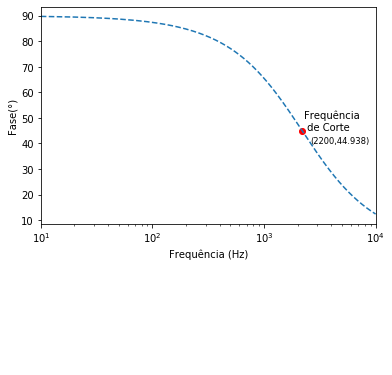

In [110]:
graphPhase(df["Freq"], df["Fase"], 2200, Ph_c)

In [122]:
df1 = df.drop("Modulo", axis = 1)

df1 = df1[((df1["Freq"]<=1000)& df1["Freq"]>=700) | ((df1["Freq"]<=2300) & (2100<=df1["Freq"])) | (df1["Freq"]==1000)]

In [123]:
print(df1.to_latex(index = False))

\begin{tabular}{rrr}
\toprule
   Freq &     Ganho &       Fase \\
\midrule
 1000.0 & -7.648544 &  65.509267 \\
 2100.0 & -3.207199 &  46.270241 \\
 2110.0 & -3.185702 &  46.134266 \\
 2120.0 & -3.164403 &  45.998909 \\
 2130.0 & -3.143301 &  45.864166 \\
 2140.0 & -3.122394 &  45.730036 \\
 2150.0 & -3.101678 &  45.596515 \\
 2160.0 & -3.081152 &  45.463601 \\
 2170.0 & -3.060814 &  45.331291 \\
 2180.0 & -3.040662 &  45.199582 \\
 2190.0 & -3.020692 &  45.068471 \\
 2200.0 & -3.000905 &  44.937957 \\
 2210.0 & -2.981296 &  44.808036 \\
 2220.0 & -2.961865 &  44.678705 \\
 2230.0 & -2.942608 &  44.549962 \\
 2240.0 & -2.923526 &  44.421804 \\
 2250.0 & -2.904614 &  44.294228 \\
 2260.0 & -2.885872 &  44.167233 \\
 2270.0 & -2.867297 &  44.040814 \\
 2280.0 & -2.848888 &  43.914969 \\
 2290.0 & -2.830643 &  43.789696 \\
 2300.0 & -2.812560 &  43.664991 \\
\bottomrule
\end{tabular}

